# **1. Perkenalan Dataset**


## 📁 Sumber Dataset
Dataset ini diperoleh dari Kaggle:  
🔗 [Heart Attack Dataset by Fatemeh Mohammadinia & Tarik A. Rashid](https://www.kaggle.com/datasets/fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid)

## 📝 Deskripsi Singkat
Dataset ini berisi data medis yang berkaitan dengan kondisi jantung dari 918 individu. Tujuan utama dataset ini adalah untuk membantu analisis dan prediksi kemungkinan serangan jantung berdasarkan beberapa parameter klinis. Dataset ini sangat cocok untuk diterapkan pada studi klasifikasi menggunakan algoritma *machine learning*.

## 🔢 Informasi Umum
- **Jumlah Data (Baris)**: 918
- **Jumlah Fitur (Kolom)**: 12
- **Jenis Analisis**: Klasifikasi Biner  
  (Apakah seseorang memiliki penyakit jantung: `1 = Ya`, `0 = Tidak`)

## 🧬 Deskripsi Fitur

| Nama Kolom         | Deskripsi                                                                 |
|--------------------|---------------------------------------------------------------------------|
| `Age`              | Usia pasien (dalam tahun)                                                 |
| `Sex`              | Jenis kelamin (`1 = Pria`, `0 = Wanita`)                                  |
| `ChestPainType`    | Tipe nyeri dada (`ATA`, `NAP`, `ASY`, `TA`)                               |
| `RestingBP`        | Tekanan darah saat istirahat (mm Hg)                                      |
| `Cholesterol`      | Kadar kolesterol serum (mg/dl)                                            |
| `FastingBS`        | Gula darah puasa > 120 mg/dl (`1 = Ya`, `0 = Tidak`)                      |
| `RestingECG`       | Hasil EKG saat istirahat (`Normal`, `ST`, `LVH`)                          |
| `MaxHR`            | Denyut jantung maksimal selama latihan                                    |
| `ExerciseAngina`   | Nyeri dada akibat olahraga (`Y = Ya`, `N = Tidak`)                        |
| `Oldpeak`          | Depresi segmen ST akibat olahraga relatif terhadap kondisi istirahat      |
| `ST_Slope`         | Kemiringan segmen ST (`Up`, `Flat`, `Down`)                               |
| `HeartDisease`     | Target / Label (`1 = Ada penyakit jantung`, `0 = Tidak ada penyakit`)     |


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

In [3]:
# Load the dataset
df = pd.read_csv('heart_attack_raw.csv')


Menampilkan Informasi Dasar tentang Dataset

In [4]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


Melihat 5 Baris Pertama dari Dataset

In [5]:
# Display the first few rows of the dataset
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


# **4. Exploratory Data Analysis (EDA)**


Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. Menampilkan Nama Kolom Dataset

In [7]:
df.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

2. Mengecek Nilai yang Hilang Setelah Pembersihan

In [6]:
# Check for missing values
df.isnull().sum()


Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

3. Menampilkan Statistik Deskriptif

In [ ]:
# Summary statistics for numerical columns
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


**Visualisasi Distribusi Usia Pasien**

Tujuan Proses:

Menganalisis jumlah pasien berdasarkan jenis kelamin dalam dataset untuk memahami apakah ada ketimpangan jumlah antara laki-laki dan perempuan yang mengalami serangan jantung.

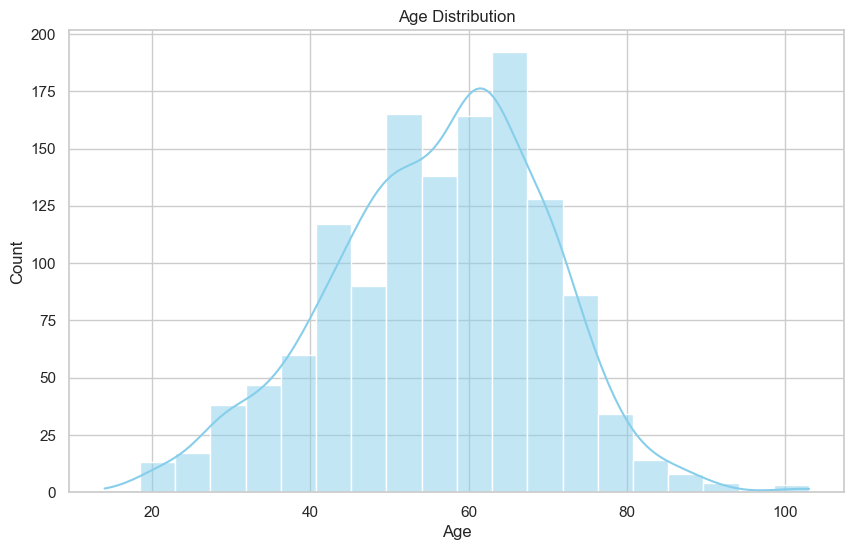

In [9]:
# Set style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Distribution of Age
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Visualisasi Distribusi Gender Pasien**

Tujuan Proses:

Menganalisis jumlah pasien berdasarkan jenis kelamin dalam dataset untuk memahami apakah ada ketimpangan jumlah antara laki-laki dan perempuan yang mengalami serangan jantung.


C:\Users\user\AppData\Local\Temp\ipykernel_8652\1088991729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


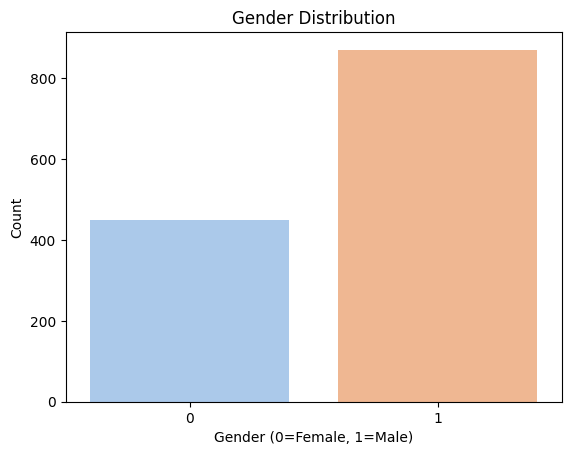

In [8]:
# 2. Gender distribution
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Count')
plt.show()

**Visualisasi Distribusi Detak Jantung Pasien**

Tujuan Proses:

Menampilkan sebaran nilai detak jantung pasien dalam dataset untuk mengidentifikasi rentang detak jantung yang umum terjadi dan potensi outlier (nilai ekstrem).

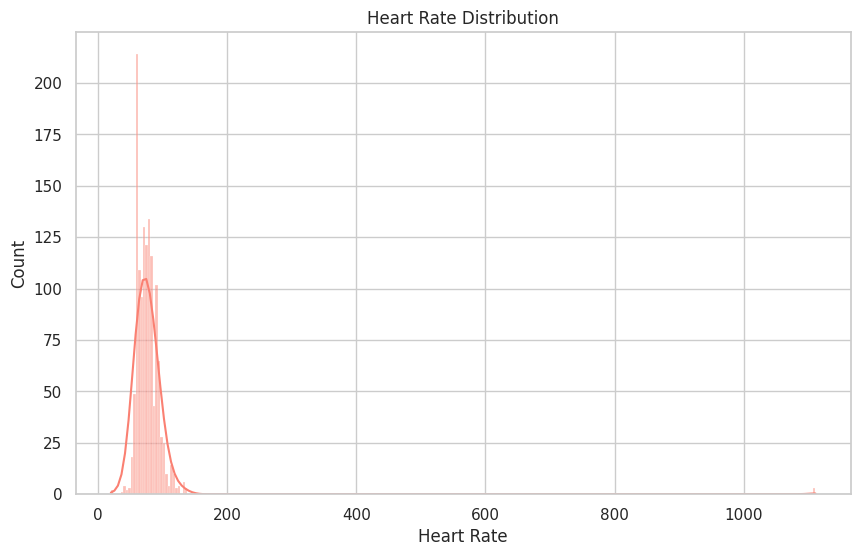

In [ ]:
# 3. Heart rate distribution
sns.histplot(df['Heart rate'], kde=True, color='salmon')
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.show()

**Visualisasi Distribusi Tekanan Darah Sistolik & Diastolik**

Tujuan Proses:

Menganalisis distribusi nilai tekanan darah sistolik dan diastolik pasien untuk mengetahui kecenderungan pola tekanan darah serta mendeteksi potensi tekanan darah tinggi (hipertensi) atau rendah (hipotensi).

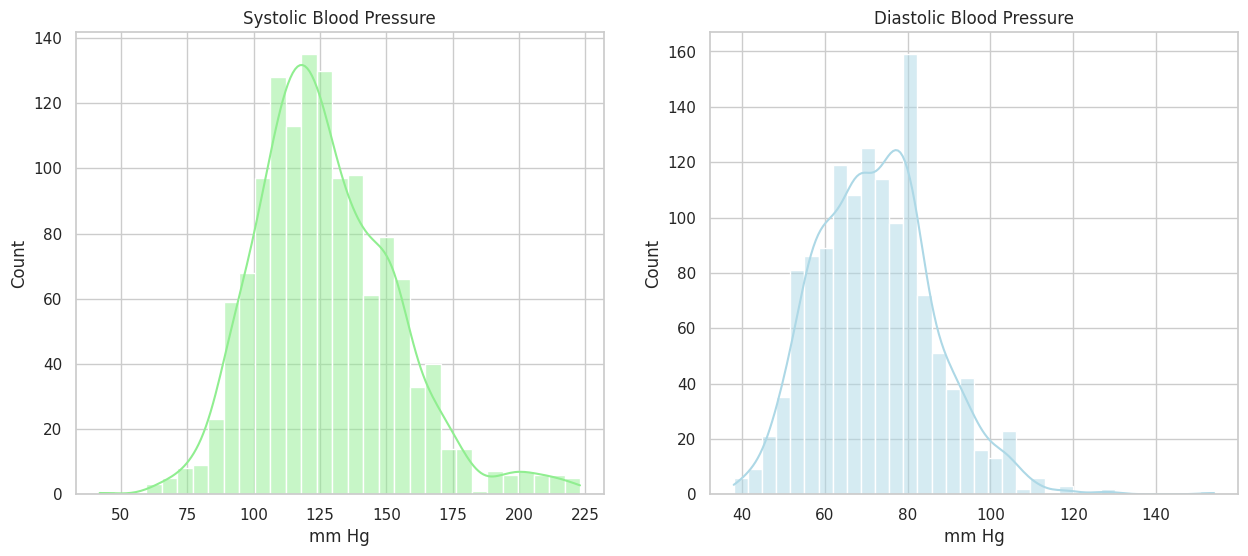

In [ ]:
# 4. Systolic & Diastolic blood pressure
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df['Systolic blood pressure'], kde=True, ax=ax[0], color='lightgreen')
ax[0].set_title('Systolic Blood Pressure')
ax[0].set_xlabel('mm Hg')
sns.histplot(df['Diastolic blood pressure'], kde=True, ax=ax[1], color='lightblue')
ax[1].set_title('Diastolic Blood Pressure')
ax[1].set_xlabel('mm Hg')
plt.show()

**Distribusi Gula Darah (Blood Sugar) Pasien**

Tujuan Visualisasi:

Menunjukkan sebaran nilai kadar gula darah dalam darah pasien (dalam satuan mg/dL) untuk mengidentifikasi pola umum, potensi diabetes, dan keterkaitannya dengan risiko serangan jantung.

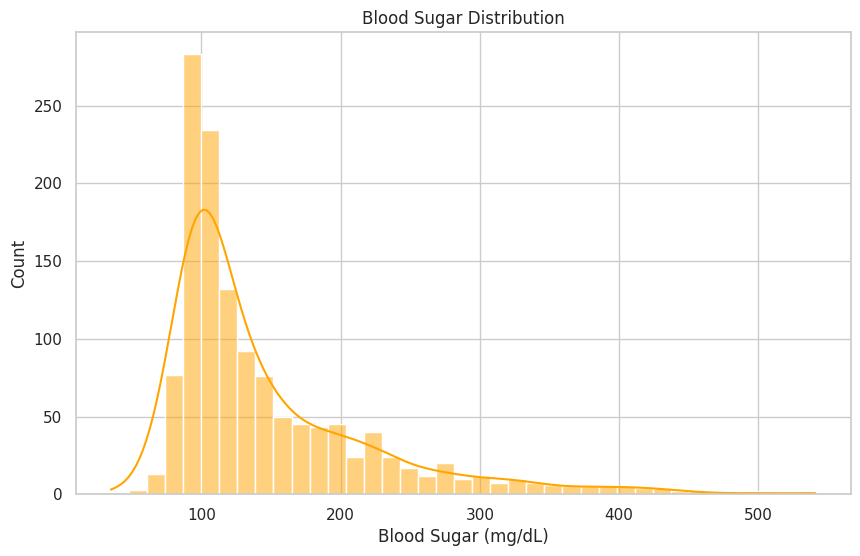

In [ ]:
# 5. Blood Sugar
sns.histplot(df['Blood sugar'], kde=True, color='orange')
plt.title('Blood Sugar Distribution')
plt.xlabel('Blood Sugar (mg/dL)')
plt.ylabel('Count')
plt.show()

**Distribusi Kadar CK-MB (Creatine Kinase-MB) Pasien**

Tujuan Visualisasi:

Menunjukkan distribusi kadar enzim CK-MB dalam darah pasien yang merupakan penanda penting kerusakan otot jantung (terutama saat terjadi serangan jantung).

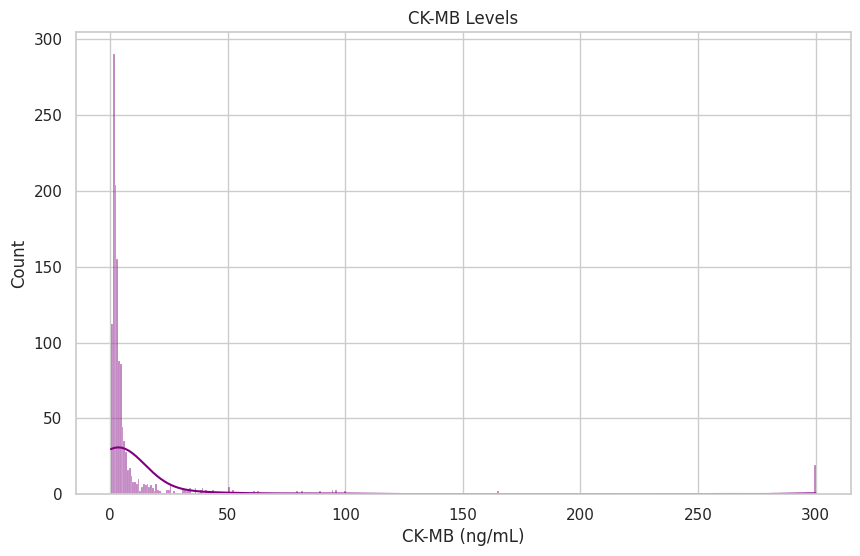

In [ ]:
# 6. CK-MB Levels
sns.histplot(df['CK-MB'], kde=True, color='purple')
plt.title('CK-MB Levels')
plt.xlabel('CK-MB (ng/mL)')
plt.ylabel('Count')
plt.show()

**Distribusi Kadar Troponin Pasien**

Tujuan Visualisasi:

Menampilkan sebaran nilai kadar Troponin dalam darah pasien. Troponin merupakan biomarker kunci dalam mendeteksi kerusakan jantung, terutama pada kasus infark miokard akut (serangan jantung).

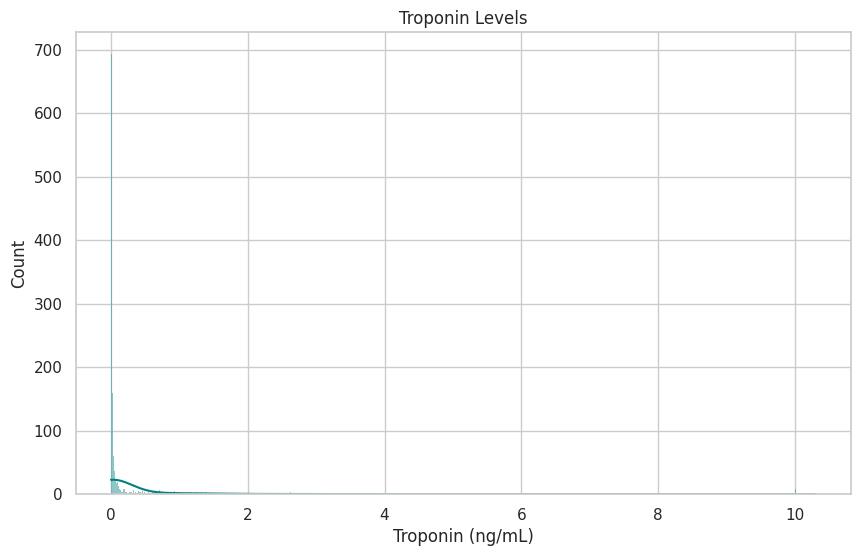

In [ ]:
# 7. Troponin Levels
sns.histplot(df['Troponin'], kde=True, color='teal')
plt.title('Troponin Levels')
plt.xlabel('Troponin (ng/mL)')
plt.ylabel('Count')
plt.show()

**Perbandingan Karakteristik Fisiologis Berdasarkan Hasil Serangan Jantung (Boxplot)**

Tujuan Visualisasi:

Menampilkan perbandingan distribusi berbagai fitur numerik (seperti usia, tekanan darah, kadar enzim) terhadap status serangan jantung (Result: 0 = tidak, 1 = iya) menggunakan boxplot, agar kita bisa mengamati perbedaan tren antar kelompok.

<ipython-input-17-35dfe58eed97>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=col, data=df, palette='Set2')


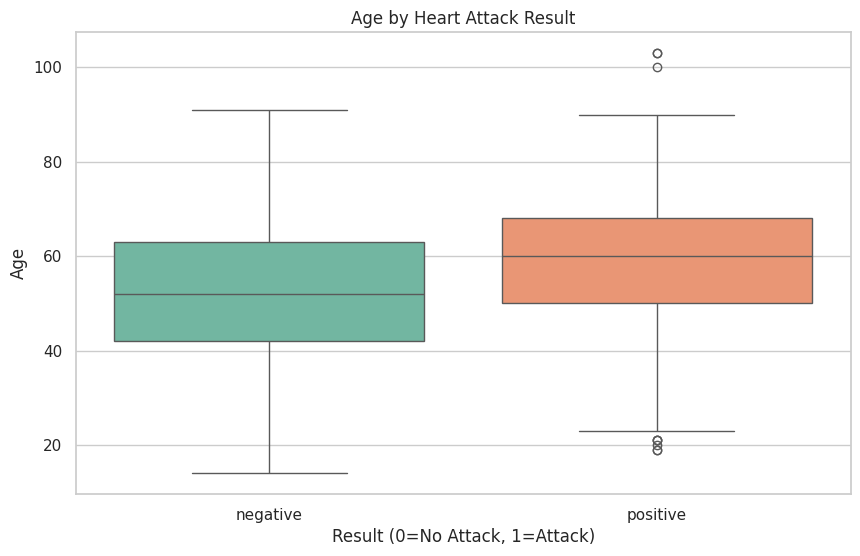

<ipython-input-17-35dfe58eed97>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=col, data=df, palette='Set2')


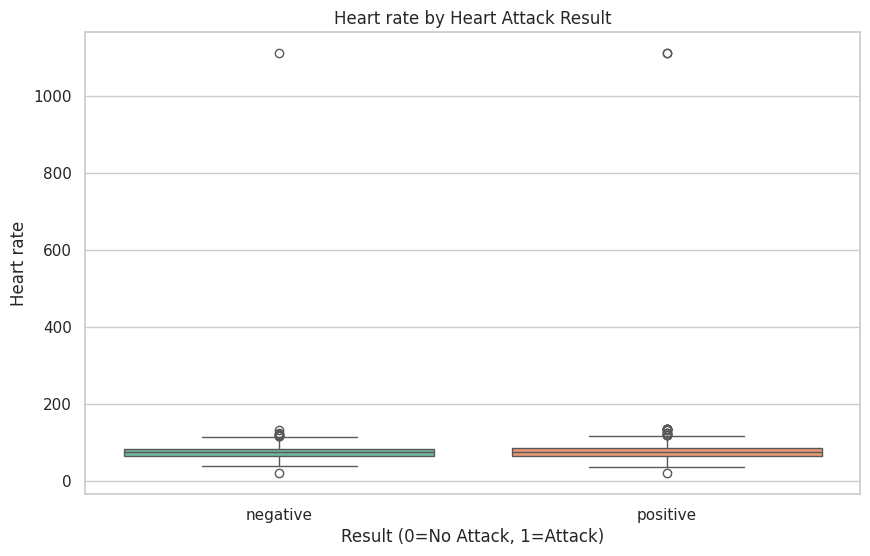

<ipython-input-17-35dfe58eed97>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=col, data=df, palette='Set2')


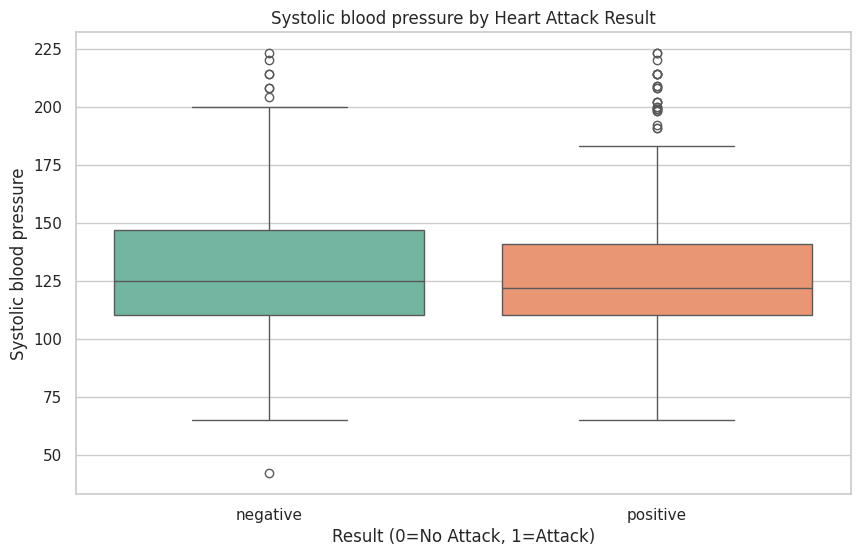

<ipython-input-17-35dfe58eed97>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=col, data=df, palette='Set2')


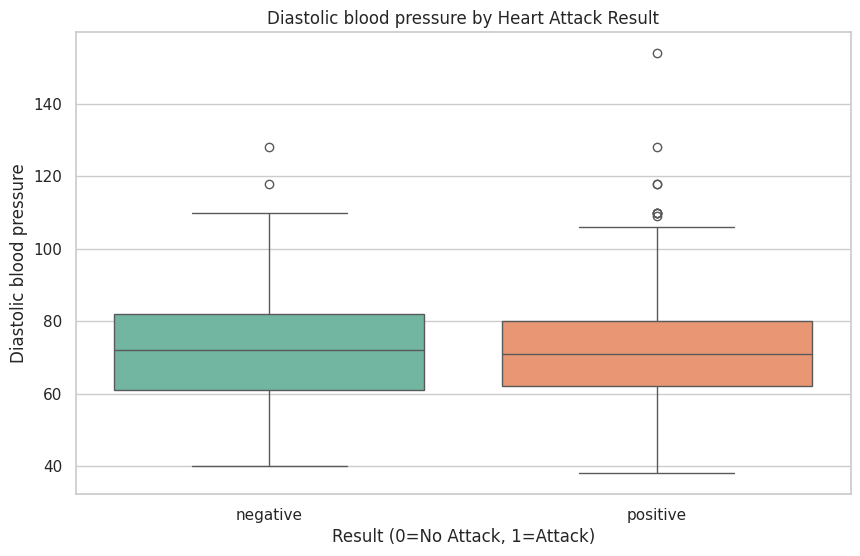

<ipython-input-17-35dfe58eed97>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=col, data=df, palette='Set2')


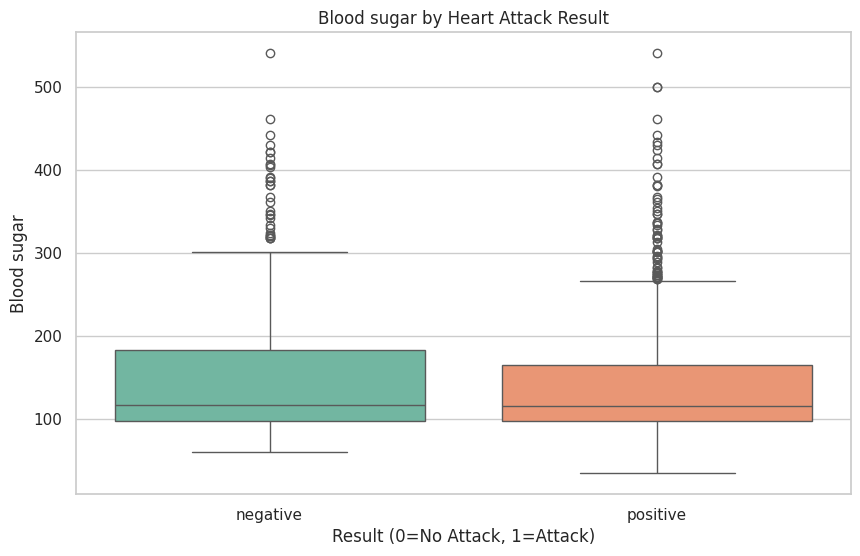

<ipython-input-17-35dfe58eed97>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=col, data=df, palette='Set2')


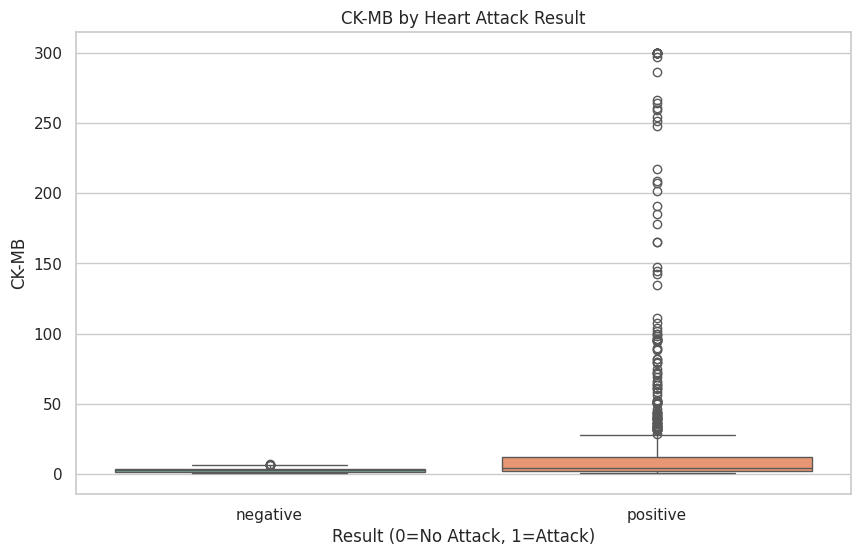

<ipython-input-17-35dfe58eed97>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=col, data=df, palette='Set2')


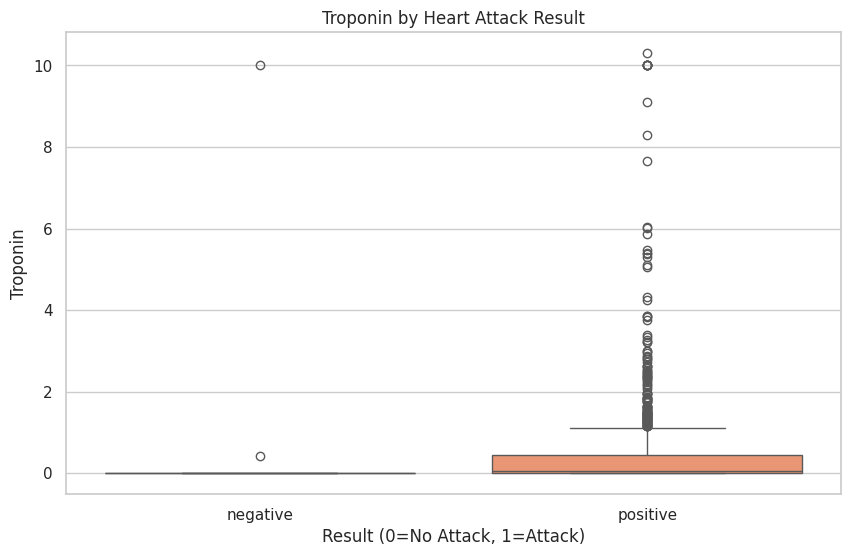

In [ ]:
# 8. Boxplots for comparing features across Result
features = ['Age', 'Heart rate', 'Systolic blood pressure',
            'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']

for col in features:
    sns.boxplot(x='Result', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Heart Attack Result')
    plt.xlabel('Result (0=No Attack, 1=Attack)')
    plt.ylabel(col)
    plt.show()

**Analisis Korelasi Antar Fitur Menggunakan Heatmap**

Tujuan:

Menganalisis hubungan antar fitur numerik dalam dataset (termasuk label Result) untuk mengidentifikasi variabel-variabel yang memiliki korelasi tinggi satu sama lain, khususnya terhadap hasil serangan jantung.

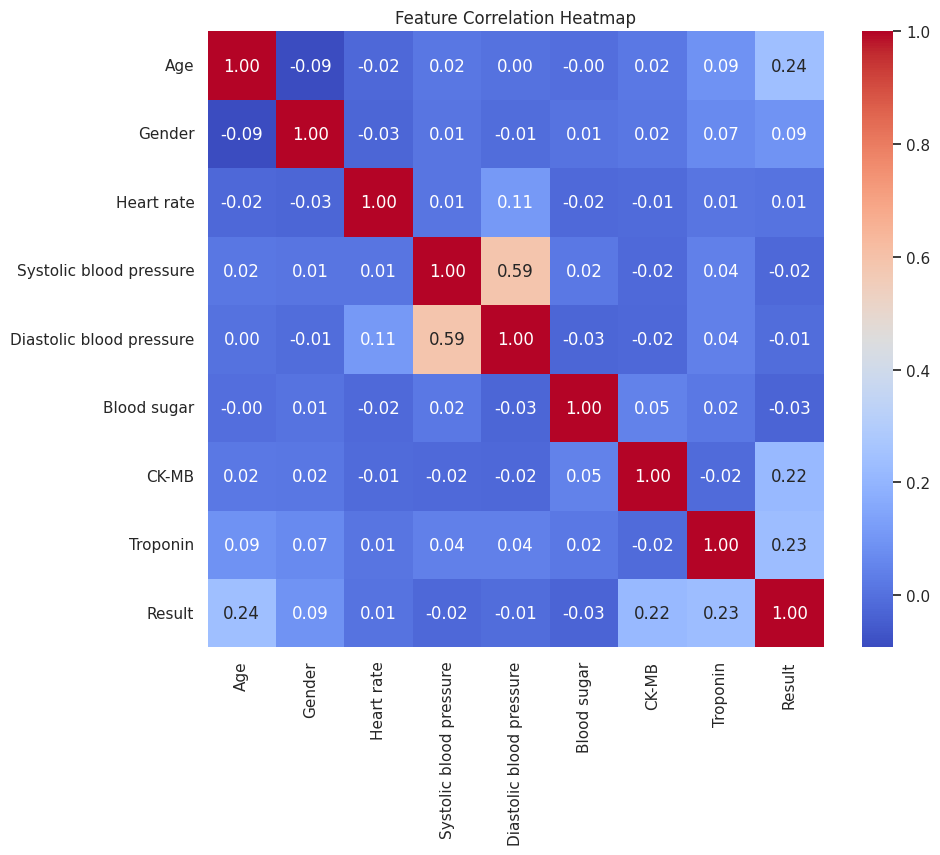

In [ ]:
# Convert 'Result' column to numeric if it's in string form like 'positive'/'negative'
df['Result'] = df['Result'].map({'negative': 0, 'positive': 1})

# Convert 'Gender' if it's also in string form
if df['Gender'].dtype == object:
    df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Drop any non-numeric columns just to be safe
numeric_df = df.select_dtypes(include=['number'])

# Now compute correlation
plt.figure(figsize=(10, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# **5. Data Preprocessing**

1. Menampilkan Jumlah Nilai Unik di Setiap Kolom

Tujuan:

Mengidentifikasi dan menghitung jumlah nilai unik yang ada di setiap kolom dalam dataset. Hal ini penting untuk memahami seberapa bervariasinya data dalam setiap kolom dan untuk memutuskan langkah selanjutnya seperti pembersihan data atau encoding.

In [10]:
print("=== Unique Values Per Column ===")
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")


=== Unique Values Per Column ===
Age: 75 unique values
Gender: 2 unique values
Heart rate: 79 unique values
Systolic blood pressure: 116 unique values
Diastolic blood pressure: 73 unique values
Blood sugar: 244 unique values
CK-MB: 700 unique values
Troponin: 352 unique values
Result: 2 unique values


2. Deteksi Outlier Menggunakan Metode IQR (Interquartile Range)

Tujuan:

Mendeteksi nilai-nilai outlier di setiap kolom numerik menggunakan metode IQR (Interquartile Range). Outlier adalah nilai yang berada jauh di luar rentang distribusi normal data, dan penting untuk mengidentifikasinya karena dapat memengaruhi analisis statistik atau model prediktif.

In [11]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Cek outlier di semua kolom numerik
print("\n=== Outlier Detection ===")
for col in df.select_dtypes(include=np.number).columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")



=== Outlier Detection ===
Age: 7 outliers
Gender: 0 outliers
Heart rate: 30 outliers
Systolic blood pressure: 32 outliers
Diastolic blood pressure: 12 outliers
Blood sugar: 92 outliers
CK-MB: 205 outliers
Troponin: 257 outliers


3. Transformasi Kolom Result menjadi Kolom heart_attack

Tujuan:

Mengubah kolom Result yang berisi label string ('positive'/'negative') menjadi kolom biner heart_attack yang menggunakan angka (1 untuk 'positive' dan 0 untuk 'negative'). Hal ini sering dilakukan dalam persiapan data untuk analisis atau model pembelajaran mesin yang lebih mudah mengelola nilai numerik.

In [12]:
df["heart_attack"] = df["Result"].apply(lambda x: 1 if x == "positive" else 0)
df = df.drop(columns = ["Result"])
df.sample(10)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,heart_attack
1066,54,1,98,110,76,362.0,2.27,0.036,1
447,50,1,73,135,79,238.0,1.87,0.005,0
612,56,1,70,103,59,136.0,56.39,0.042,1
456,43,1,52,132,82,207.0,3.43,0.006,0
1257,49,1,70,117,76,87.0,1.83,0.051,1
1065,65,1,61,130,74,109.0,19.63,0.017,1
297,91,1,80,65,53,94.0,5.37,0.013,0
161,32,1,72,136,80,111.0,5.60,0.003,0
795,70,1,77,100,68,124.0,3.61,1.580,1
6,32,0,40,179,68,102.0,0.71,0.003,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   heart_attack              1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


4. Fungsi untuk Menghapus Outlier Menggunakan Metode IQR (Interquartile Range)

Deskripsi Proses:

Proses ini bertujuan untuk menghapus data yang dianggap outlier (nilai ekstrem) dalam dataset dengan menggunakan metode Interquartile Range (IQR). 

In [14]:
# --- Fungsi untuk menghapus outlier menggunakan IQR ---
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

5. Kolom Numerik untuk Deteksi Outlier

Tujuan:

Menentukan kolom-kolom numerik dalam dataset yang akan digunakan untuk mendeteksi outlier. Kolom-kolom numerik ini berisi data yang relevan dalam analisis kesehatan pasien dan dapat dipengaruhi oleh nilai ekstrem (outlier) yang dapat merusak integritas analisis. Deteksi outlier bertujuan untuk memastikan bahwa data yang digunakan dalam analisis atau model lebih bersih dan lebih representatif.

In [15]:
# --- Kolom numerik untuk deteksi outlier ---
numeric_cols = ['Age', 'Heart rate', 'Systolic blood pressure',
                'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']


6. Menghapus Outlier dari Dataset Menggunakan IQR

Tujuan:

Proses ini bertujuan untuk menghapus nilai-nilai outlier dari kolom numerik dalam dataset menggunakan metode Interquartile Range (IQR). Outlier adalah nilai ekstrem yang dapat memengaruhi analisis statistik atau kinerja model pembelajaran mesin. Dengan menghapus outlier, kita dapat memastikan bahwa data yang digunakan lebih representatif dan lebih mudah diproses untuk analisis lebih lanjut.

In [16]:
# --- Salin dataframe asli ---
df_clean = df.copy()

# --- Hapus outlier ---
df_clean = remove_outliers_iqr(df_clean, numeric_cols)

7. Pisahkan Fitur dan Label dalam Dataset

Tujuan:

Proses ini bertujuan untuk memisahkan data menjadi dua bagian: fitur (independent variables) dan label (dependent variable). Ini adalah langkah penting dalam mempersiapkan data untuk analisis atau pembelajaran mesin, di mana fitur digunakan sebagai input untuk model dan label digunakan sebagai target yang akan diprediksi.

In [17]:
# --- Pisahkan fitur dan label ---
X = df_clean.drop(columns='heart_attack')
y = df_clean['heart_attack']


8. Normalisasi Data Menggunakan StandardScaler

Tujuan:

Proses ini bertujuan untuk menormalkan data fitur menggunakan metode StandardScaler. Normalisasi atau standardisasi fitur sangat penting dalam banyak algoritma pembelajaran mesin karena memastikan bahwa semua fitur memiliki skala yang sama, yang dapat meningkatkan kinerja model dan mempercepat konvergensi. StandardScaler mengubah data sehingga memiliki rata-rata 0 dan deviasi standar 1.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# --- Normalisasi (StandardScaler) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

9. Pembagian Data Menjadi Train dan Test Set

Tujuan:

Tujuan dari proses ini adalah untuk membagi dataset menjadi dua subset: train set untuk melatih model, dan test set untuk mengevaluasi kinerja model setelah pelatihan. Pembagian ini penting untuk menghindari overfitting, yaitu ketika model terlalu fit dengan data pelatihan dan tidak dapat menggeneralisasi dengan baik pada data yang belum terlihat (test set).

In [19]:
# --- Split train-test ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Cek hasil
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (630, 8), Test shape: (158, 8)
